# IMPORTTING LIBRARIES AND LOADING DATA

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df= pd.read_csv("../input/m5-forecasting-accuracy/sales_train_evaluation.csv")
sell_prices = pd.read_csv("../input/m5-forecasting-accuracy/sell_prices.csv")
calendar = pd.read_csv("../input/m5-forecasting-accuracy/calendar.csv")

In [3]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [4]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


# Exploratory Data Analysis

Sale Trend a single Product

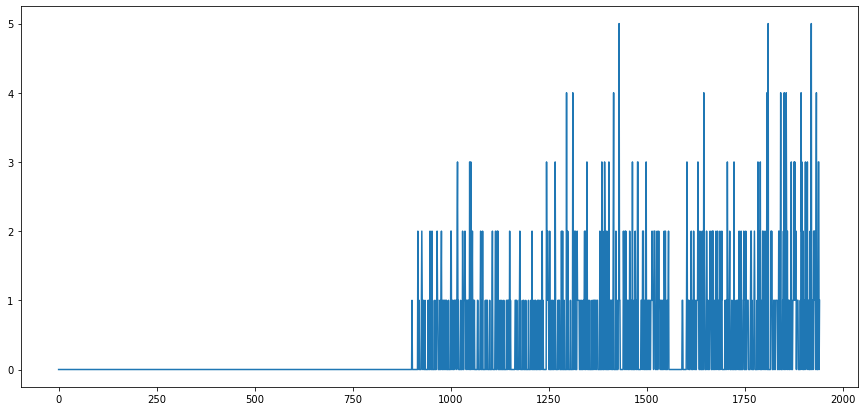

In [16]:
one = pd.DataFrame(df.drop(['id','item_id','dept_id','cat_id','store_id','state_id'],axis=1).loc[0])
one[1] = [x for x in range(1941)]
one.columns = ['sales','dayno']
plt.figure(figsize=(15,7))
plt.plot([x for x in range(1941)],one['sales'])

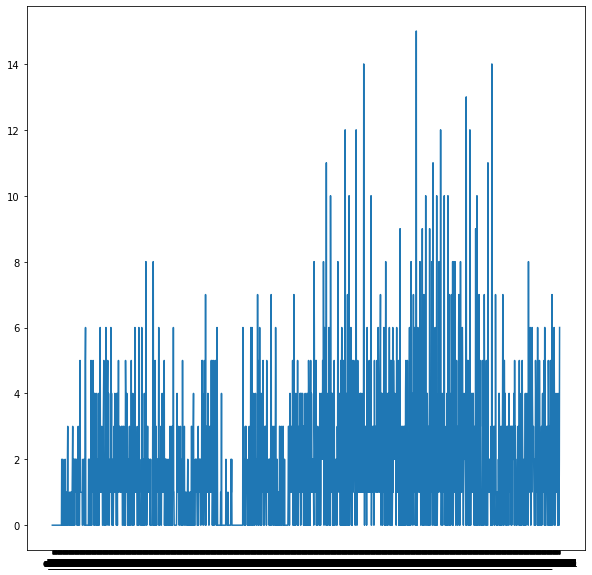

In [8]:
x = pd.DataFrame(df.drop(['id','item_id','dept_id','cat_id','store_id','state_id'],axis=1).loc[3])
x[1] = [x for x in range(1941)]
x.columns = ['sales','dayno']
plt.figure(figsize=(10,10))
plt.plot(x['sales'])

# Daily Overall sale trend in all stores 

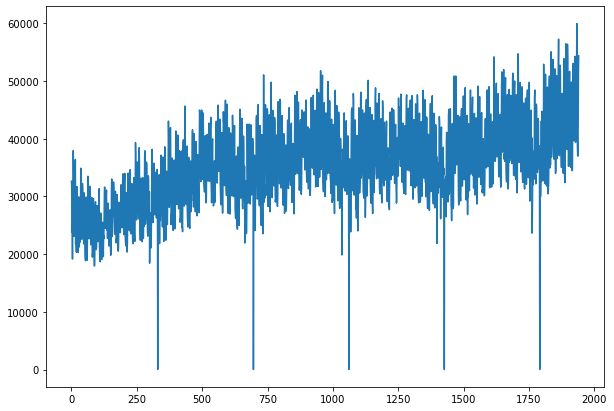

In [9]:
agg_sales = df.drop(['id','item_id','dept_id','cat_id','store_id','state_id'],axis=1).sum()
agg_sales.index = [x for x in range(1941)]
plt.figure(figsize=(10,7))
agg_sales.plot()

# Category wise Sale Trend

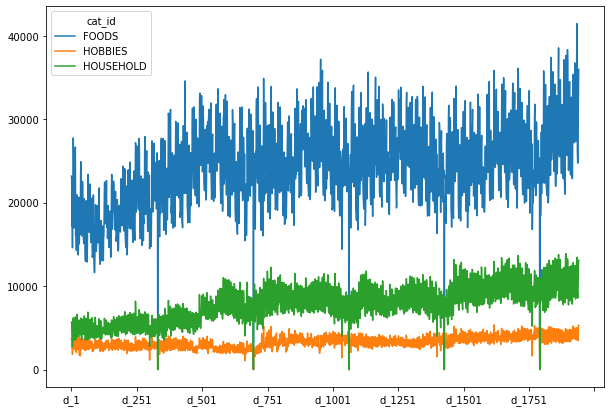

In [10]:
cat_agg =df.drop(['id','item_id','dept_id','store_id','state_id'],axis=1).groupby('cat_id').sum()
cat_agg.transpose().plot(figsize=(10,7));

# Store wise sale trend

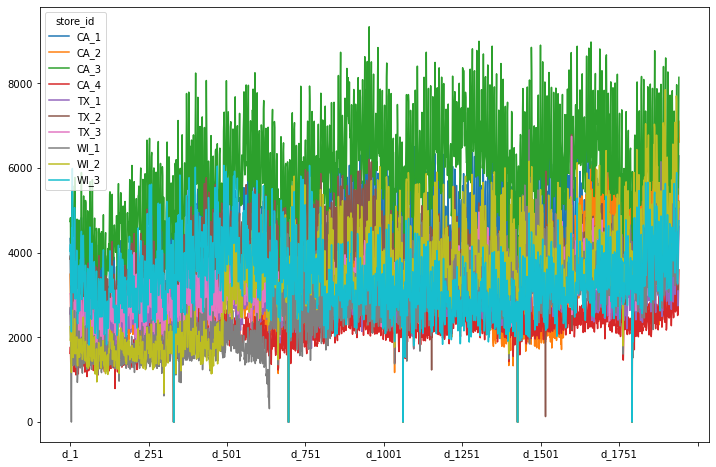

In [11]:
store_agg = df.drop(['id','item_id','dept_id','state_id','cat_id'],axis=1).groupby('store_id').sum()
store_agg.transpose().plot(figsize=(12,8));

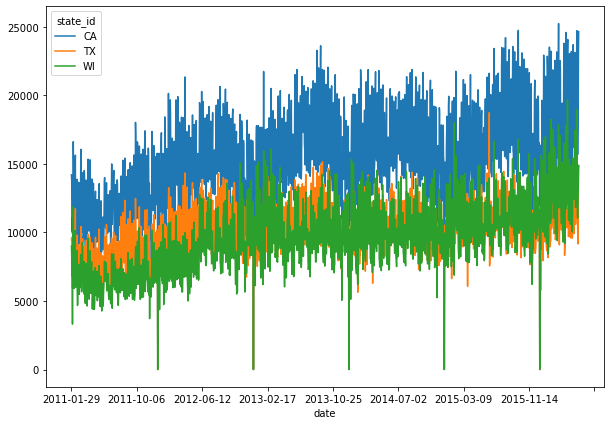

In [12]:
store_agg = df.drop(['id','item_id','dept_id','store_id','cat_id'],axis=1).groupby('state_id').sum()
store_agg.columns=  calendar['date'].head(1941)
store_agg.transpose().plot(figsize=(10,7));

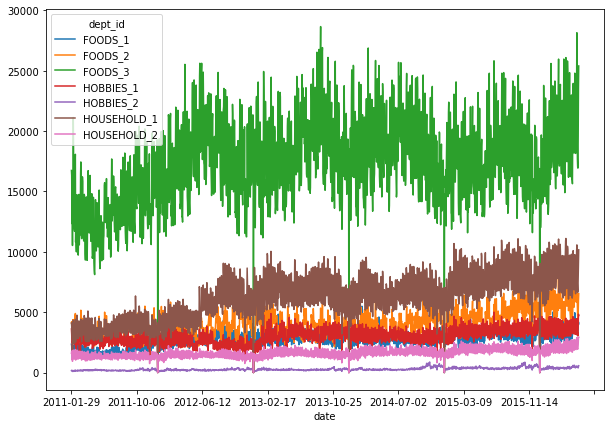

In [13]:
store_agg = df.drop(['id','item_id','store_id','state_id','cat_id'],axis=1).groupby('dept_id').sum()
store_agg.columns=  calendar['date'].head(1941)
store_agg.transpose().plot(figsize=(10,7));

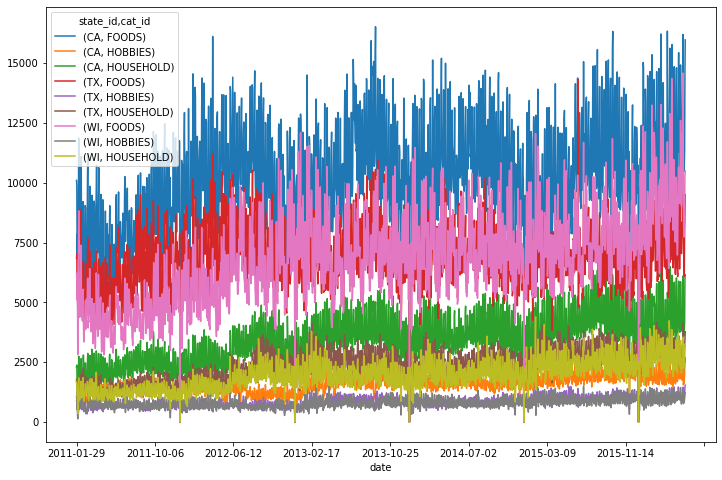

In [14]:
store_agg = df.drop(['id','item_id','store_id','dept_id'],axis=1).groupby(['state_id','cat_id']).sum()
store_agg.columns=  calendar['date'].head(1941)
store_agg.transpose().plot(figsize=(12,8));

# Statewise sales based on the category with a rolling mean of 7 

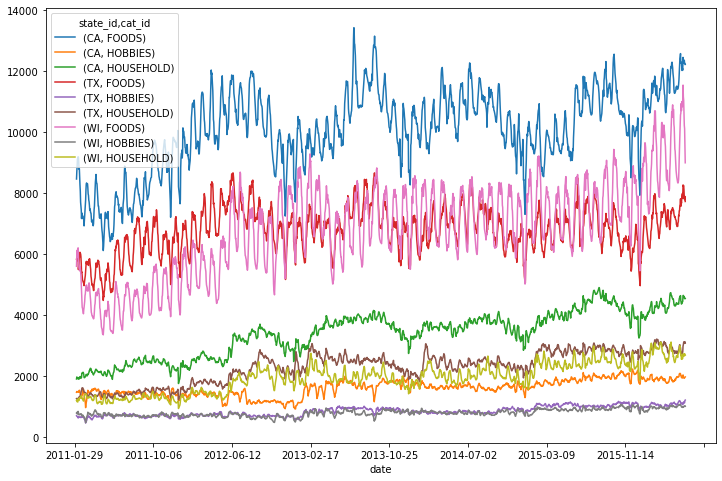

In [15]:
store_agg.transpose().rolling(window=7).mean().plot(figsize=(12,8));

In [18]:
import gc
del df,store_agg,cat_agg,agg_sales,one,x
gc.collect()

12585

In [21]:
import warnings 
warnings.filterwarnings('ignore')

# Reduce the memory usage of the dataframe by downcasting the int and float to avoid the memory error

In [19]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [20]:
calendar = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/calendar.csv')
calendar = reduce_mem_usage(calendar)

sell_prices = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sell_prices.csv')
sell_prices = reduce_mem_usage(sell_prices)

sales_train_validation = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sales_train_evaluation.csv')

submission = pd.read_csv('/kaggle/input/m5-forecasting-accuracy/sample_submission.csv')
submission = reduce_mem_usage(submission)

Mem. usage decreased to  0.12 Mb (41.9% reduction)
Mem. usage decreased to 130.48 Mb (37.5% reduction)
Mem. usage decreased to  2.09 Mb (84.5% reduction)


In [ ]:
sales_train_validation = pd.melt(sales_train_validation,
                                 id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                                 var_name = 'day',
                                 value_name = 'demand')
sales_train_validation = reduce_mem_usage(sales_train_validation)

# Preparing the test set for the next 28 + 28 days

In [ ]:
test2_rows = [row for row in submission['id'] if 'evaluation' in row]
test2 = submission[submission['id'].isin(test2_rows)]

test2.columns = ['id', 'd_1942', 'd_1943', 'd_1944', 'd_1945', 'd_1946', 'd_1947', 'd_1948', 'd_1949', 'd_1950', 'd_1951', 'd_1952', 'd_1953', 'd_1954', 'd_1955', 'd_1956', 'd_1957', 'd_1958', 'd_1959', 
                  'd_1960', 'd_1961', 'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966', 'd_1967', 'd_1968', 'd_1969']

product = sales_train_validation[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']].drop_duplicates()


test2 = test2.merge(product, how = 'left', on = 'id')

test2 = pd.melt(test2, 
                id_vars = ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], 
                var_name = 'day', 
                value_name = 'demand')

sales_train_validation['part'] = 'train'
test2['part'] = 'test'

# Merging the Train and test Data

In [ ]:
data = pd.concat([sales_train_validation,test1,test2], axis = 0)
import gc
del sales_train_validation,test2,test1
gc.collect()

In [ ]:
data.reset_index(drop=True,inplace=True)
data = data.loc[30000000:]
calendar.drop(['weekday', 'wday', 'month', 'year'], inplace = True, axis = 1)
data = pd.merge(data, calendar, how = 'left', left_on = ['day'], right_on = ['d'])
data.drop(['d', 'day'], inplace = True, axis = 1)

In [ ]:
data = data.merge(sell_prices, on = ['store_id', 'item_id', 'wm_yr_wk'], how = 'left')
del calendar,sell_prices,product
gc.collect()

# Encoding the Categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
nan_features = ['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
for feature in nan_features:
    data[feature].fillna('unknown', inplace = True)

cat = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']
for feature in cat:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])

# Creating the Time Lagged Features 

In [ ]:
data['lag_t28'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28))
data['lag_t29'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(29))
data['lag_t30'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(30))
data['rolling_mean_t7']   = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).mean())
data['rolling_std_t7']    = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(7).std())
data['rolling_mean_t30']  = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).mean())

In [ ]:
data = reduce_mem_usage(data)

In [ ]:
data['rolling_mean_t90']  = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(90).mean())
data['rolling_mean_t180'] = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(180).mean())
data['rolling_std_t30']   = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).std())
data['rolling_skew_t30']  = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).skew())
data['rolling_kurt_t30']  = data.groupby(['id'])['demand'].transform(lambda x: x.shift(28).rolling(30).kurt())

In [ ]:
data['lag_price_t1'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1))
data['price_change_t1'] = (data['lag_price_t1'] - data['sell_price']) / (data['lag_price_t1'])
data['rolling_price_max_t365'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.shift(1).rolling(365).max())
data['price_change_t365'] = (data['rolling_price_max_t365'] - data['sell_price']) / (data['rolling_price_max_t365'])
data['rolling_price_std_t7'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(7).std())
data['rolling_price_std_t30'] = data.groupby(['id'])['sell_price'].transform(lambda x: x.rolling(30).std())
data.drop(['rolling_price_max_t365', 'lag_price_t1'], inplace = True, axis = 1)

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['week'] = data['date'].dt.week
data['day'] = data['date'].dt.day
data['dayofweek'] = data['date'].dt.dayofweek

In [ ]:
def weekend(arg):
    if arg==5 or arg==6:
        return 1
    else:
        return 0
data['isweekend'] = data['dayofweek'].apply(weekend)

In [ ]:
data['revenue'] = data['demand'] * data['sell_price']
data['lag_revenue_t1'] = data.groupby(['id'])['revenue'].transform(lambda x: x.shift(28))
data['rolling_revenue_std_t28'] = data.groupby(['id'])['lag_revenue_t1'].transform(lambda x: x.rolling(28).std())
data['rolling_revenue_mean_t28'] = data.groupby(['id'])['lag_revenue_t1'].transform(lambda x: x.rolling(28).mean())
data.drop(['revenue'],axis=1,inplace=True)

In [ ]:
features = ['item_id', 'cat_id', 'state_id', 'year', 'month', 'week', 'day', 'dayofweek', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2', 
            'snap_CA', 'snap_TX', 'snap_WI', 'sell_price', 'lag_t28', 'lag_t29', 'lag_t30', 'rolling_mean_t7', 'rolling_std_t7', 'rolling_mean_t30', 'rolling_mean_t90', 
            'rolling_mean_t180', 'rolling_std_t30', 'price_change_t1', 'price_change_t365', 'rolling_price_std_t7', 'rolling_price_std_t30', 'rolling_skew_t30', 'rolling_kurt_t30',
            'isweekend','lag_revenue_t1','rolling_revenue_std_t28','rolling_revenue_mean_t28'
        ]
data = reduce_mem_usage(data)

# Train and test split (Time based split)

In [ ]:
x_train = data[data['part'] == 'train']
y_train = x_train['demand']
x_val = data[(data['date'] > '2016-04-24') & (data['part'] == 'train')]
y_val = x_val['demand']
test = data[data['date'] > '2016-04-24']
test.loc[test['part']=='train','id'] = test.loc[test['part']=='train','id'].str.replace('_evaluation','_validation')
x_train.drop(['demand','part',],inplace=True,axis=1)
x_val.drop(['demand','part',],inplace=True,axis=1)
test.drop(['demand','part',],inplace=True,axis=1)

In [ ]:
del data
gc.collect()

# Modelling using LightGBM

In [ ]:
from lightgbm import Dataset,train,plot_importance
params = {
    'boosting_type': 'gbdt',
    'metric': 'rmse',
    'objective': 'regression',
    'n_jobs': -1,
    'seed': 236,
    'learning_rate': 0.1}

In [ ]:
category = x_train['dept_id'].unique()
category2 = x_train['store_id'].unique()
def dataset(categor,categor2):
    tindex = x_train[(x_train['dept_id']==categor) & (x_train['store_id']==categor2)].index.values
    vindex = x_val[(x_val['dept_id']==categor)&(x_val['store_id']==categor2)].index.values
    
    x_t,x_v,y_t,y_v,t =  x_train[(x_train['dept_id']==categor) & (x_train['store_id']==categor2)],x_val[(x_val['dept_id']==categor)&(x_val['store_id']==categor2)],y_train.loc[tindex],y_val.loc[vindex],test[(test['dept_id']==categor) &(test['store_id']==categor2)]
    
    x_train.drop(tindex,axis=0,inplace=True)
    x_val.drop(vindex,axis=0,inplace=True)
    test.drop(test[(test['dept_id']==categor) &(test['store_id']==categor2)].index.values,axis=0,inplace=True)
    
    return x_t,x_v,y_t,y_v,t

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
TEST = None

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

for i in category:
    for j in category2:
        x_t,x_v,y_t,y_v,t = dataset(i,j)
        train_set = Dataset(x_t[features], y_t)
        val_set = Dataset(x_v[features], y_v)
        del x_t, y_t
        gc.collect()

        model = train(params, train_set, num_boost_round = 7000, early_stopping_rounds = 40, valid_sets = [train_set, val_set], verbose_eval = 1000)
        y_pred = model.predict(t[features])

        t['demand'] = y_pred

        TEST = pd.concat([TEST,t],axis=0)
        plot_features(model, (10,14))

        del x_v,y_v,t,train_set,val_set,y_pred,model
        gc.collect()

In [ ]:
predictions1 = TEST[TEST['id'].apply(lambda x: "validation" in x)][['id', 'date', 'demand']]
predictions2 = TEST[TEST['id'].apply(lambda x: "evaluation" in x)][['id', 'date', 'demand']]

In [ ]:
prediction1 = pd.pivot(predictions1, index = 'id', columns = 'date', values = 'demand').reset_index()
prediction2 = pd.pivot(predictions2, index = 'id', columns = 'date', values = 'demand').reset_index()
prediction1.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]
prediction2.columns = ['id'] + ['F' + str(i + 1) for i in range(28)]

In [ ]:
predictions = pd.concat([prediction1,prediction2],axis=0)
predictions.to_csv("submissionstoreanddeptwise.csv",index=False)

In [ ]:
!zip submissiondeptwise.zip submissiondeptwise.csv